<a href="https://colab.research.google.com/github/pathilink/HospAEinstein_test/blob/main/notebook/pnad_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#004f92>Data Analyst Test - Hospital Albert Einstein</font>

## Information

Public data from the 2020 PNAD COVID-19 survey:
[link](https://www.ibge.gov.br/estatisticas/sociais/saude/27947-divulgacao-mensal-pnadcovid2.html?edicao=28351&t=downloadsArquivos)

## Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# import datetime

In [2]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.precision', 2) # decimal
# pd.set_option('float_format', '{:.2f}'.format) # scientific notation

In [3]:
# import the google.colab module
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_052020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_062020.csv')
df3 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_072020.csv')
df4 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_082020.csv')
df5 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_092020.csv')
df6 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_102020.csv')
df7 = pd.read_csv('/content/drive/MyDrive/test/einstein/data/PNAD_COVID_112020.csv')

In [5]:
print('df1 has {} rows and {} columns.'.format(df1.shape[0], df1.shape[1]))
print('df2 has {} rows and {} columns.'.format(df2.shape[0], df2.shape[1]))
print('df3 has {} rows and {} columns.'.format(df3.shape[0], df3.shape[1]))
print('df4 has {} rows and {} columns.'.format(df4.shape[0], df4.shape[1]))
print('df5 has {} rows and {} columns.'.format(df5.shape[0], df5.shape[1]))
print('df6 has {} rows and {} columns.'.format(df6.shape[0], df6.shape[1]))
print('df7 has {} rows and {} columns.'.format(df7.shape[0], df7.shape[1]))

df1 has 349306 rows and 114 columns.
df2 has 381270 rows and 114 columns.
df3 has 384166 rows and 145 columns.
df4 has 386520 rows and 145 columns.
df5 has 387298 rows and 145 columns.
df6 has 380461 rows and 145 columns.
df7 has 381438 rows and 148 columns.


## Data preparation

In [6]:
# check equal columns
list_df = [df1, df2, df3, df4, df5, df6, df7] # indexes: 0, 1, 2, 3, 4, 5, 6

for i in range(len(list_df) - 1):
    df1 = list_df[i]
    df2 = list_df[i + 1]

    # compare columns regardless of the order
    if set(df1.columns) == set(df2.columns):
        print(f"DataFrames at index {i} and {i+1} have the same columns.")
    else:
        print(f"DataFrames at index {i} and {i+1} have different columns.")

DataFrames at index 0 and 1 have the same columns.
DataFrames at index 1 and 2 have different columns.
DataFrames at index 2 and 3 have the same columns.
DataFrames at index 3 and 4 have the same columns.
DataFrames at index 4 and 5 have the same columns.
DataFrames at index 5 and 6 have different columns.


In [7]:
# compares all df pairs
for i in range(len(list_df)):
    for j in range(i + 1, len(list_df)):
        df1 = list_df[i]
        df2 = list_df[j]

        # compare columns
        if set(df1.columns) == set(df2.columns): #df1.columns.equals(df2.columns):
            print(f"DataFrames at index {i} and {j} have the same columns.")
        else:
            print(f"DataFrames at index {i} and {j} have different columns.")

DataFrames at index 0 and 1 have the same columns.
DataFrames at index 0 and 2 have different columns.
DataFrames at index 0 and 3 have different columns.
DataFrames at index 0 and 4 have different columns.
DataFrames at index 0 and 5 have different columns.
DataFrames at index 0 and 6 have different columns.
DataFrames at index 1 and 2 have different columns.
DataFrames at index 1 and 3 have different columns.
DataFrames at index 1 and 4 have different columns.
DataFrames at index 1 and 5 have different columns.
DataFrames at index 1 and 6 have different columns.
DataFrames at index 2 and 3 have the same columns.
DataFrames at index 2 and 4 have the same columns.
DataFrames at index 2 and 5 have the same columns.
DataFrames at index 2 and 6 have different columns.
DataFrames at index 3 and 4 have the same columns.
DataFrames at index 3 and 5 have the same columns.
DataFrames at index 3 and 6 have different columns.
DataFrames at index 4 and 5 have the same columns.
DataFrames at index

In [8]:
# concatenate
result_df = pd.concat([df3, df4, df5#, df6 <-- df removed to save memory
                       ], ignore_index=True)
result_df.sample(5)

,Ano,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,...,F001,F0021,F0022,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
729881,2020,50,50.0,NaN,3,3,8,4,5010011,500038100,...,2,NaN,NaN,1,1,1,2,1,1,2.0
10530,2020,12,NaN,NaN,7,4,7,3,1250010,120000770,...,1,NaN,NaN,1,1,1,2,1,2,NaN
973026,2020,32,32.0,32.0,13,3,9,5,3210011,320026624,...,2,NaN,NaN,1,1,1,1,1,1,1.0
979554,2020,32,NaN,NaN,13,4,9,5,3251011,320055562,...,1,NaN,NaN,1,1,1,2,1,2,NaN
632921,2020,35,35.0,35.0,1,2,8,4,3510212,350360653,...,3,1300.0,4.0,1,1,1,2,1,1,1.0


In [9]:
# data types
result_df.info() #verbose=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157984 entries, 0 to 1157983
Columns: 145 entries, Ano to F006
dtypes: float64(87), int64(58)
memory usage: 1.3 GB


In [10]:
# missing data
total = result_df.isnull().sum().sort_values(ascending=False)
percent = (result_df.isnull().sum()/result_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage'])
missing_data.query('Total > 0')

,Total,Percentage
C0103,1157752,0.999800
C0052,1157612,0.999679
C0053,1157394,0.999490
B006,1157267,0.999381
C007E2,1156145,0.998412
...,...,...
C002,611069,0.527701
D0053,557240,0.481216
C014,410362,0.354376
C001,203870,0.176056


In [11]:
# keep COVID-19 variables & drop Percentage > 80
# missing_data[~missing_data.index.str.startswith('B')].query('Percentage > 0.80')

In [12]:
# drop columns
result_df = result_df.drop(
    columns=missing_data[~missing_data.index.str.startswith('B')]
    .query('Percentage > 0.80').index.to_list())
result_df.shape

(1157984, 111)

In [13]:
# unique values per column
col_list = []
nunique_list = []

for col in result_df:
  col_list.append(col)
  nunique_list.append(result_df[col].nunique())

# list(zip(col_list, nunique_list))
df_nunique = pd.DataFrame(
    {'column': col_list,
     'nunique': nunique_list
     }
)

df_nunique

,column,nunique
0,Ano,1
1,UF,27
2,CAPITAL,27
3,RM_RIDE,21
4,V1008,14
...,...,...
106,F002A3,3
107,F002A4,3
108,F002A5,3
109,F0061,3


In [14]:
df_nunique.query('nunique == 1')

,column,nunique
0,Ano,1
80,C010,1
81,C0101,1
84,C011A,1
85,C011A1,1


In [15]:
# drop columns with unique value
result_df = result_df.drop(columns=df_nunique.query('nunique == 1')['column'].to_list())
result_df.shape

(1157984, 106)

In [16]:
# change types
col_parte1 = ['UF', 'CAPITAL', 'RM_RIDE', 'V1012', 'V1013', 'Estrato', 'UPA', 'V1022', 'V1023', 'posest']
col_parteA = ['A001A', 'A003', 'A004', 'A005', 'A006', 'A007']
col_parteB = ['B0011', 'B0012', 'B0013', 'B0014', 'B0015', 'B0016', 'B0017', 'B0018', 'B0019', 'B00110',
              'B00111', 'B00112', 'B00113', 'B002', 'B0031', 'B0032', 'B0033', 'B0034', 'B0035', 'B0036',
              'B0037', 'B0041', 'B0042', 'B0043', 'B0044', 'B0045', 'B0046', 'B005', 'B006', 'B007',
              'B008', 'B009A', 'B009B', 'B009C', 'B009D', 'B009E', 'B009F', 'B0101', 'B0102', 'B0103',
              'B0104', 'B0105', 'B0106', 'B011']
col_parteC = ['C001', 'C002', 'C006', 'C007', 'C007B', 'C007C', 'C007D', 'C01011', 'C011A11', 'C012',
              'C014', 'C015', 'C016', 'C017A']
col_parteD = ['D0011', 'D0021', 'D0031', 'D0041', 'D0051', 'D0061', 'D0071']
col_parteE = ['E001']
col_parteF = ['F001', 'F002A1', 'F002A2', 'F002A3', 'F002A4', 'F002A5', 'F0061']
# col_parteFint = ['F006']

result_df[col_parte1] = result_df[col_parte1].astype(str)
result_df[col_parteA] = result_df[col_parteA].astype(str)
result_df[col_parteB] = result_df[col_parteB].astype(str)
result_df[col_parteC] = result_df[col_parteC].astype(str)
result_df[col_parteD] = result_df[col_parteD].astype(str)
result_df[col_parteE] = result_df[col_parteE].astype(str)
result_df[col_parteF] = result_df[col_parteF].astype(str)
# result_df[col_parteFint] = result_df[col_parteFint].astype(int) # <-- NAs

In [17]:
result_df.sample(5)

,UF,CAPITAL,RM_RIDE,V1008,V1012,V1013,V1016,Estrato,UPA,V1022,...,D0071,E001,F001,F002A1,F002A2,F002A3,F002A4,F002A5,F0061,F006
717492,43,nan,nan,11,2,8,4,4352011,430009005,1,...,1,3,1,1,1,1,2,1,1,2.0
173560,31,nan,nan,9,3,7,3,3130011,310209734,1,...,2,1,1,1,1,1,1,1,1,1.0
566946,31,nan,nan,4,2,8,4,3152012,310212198,1,...,2,2,3,1,1,1,1,1,1,3.0
38369,16,16.0,16.0,13,2,7,3,1610111,160002090,1,...,2,3,1,1,1,1,1,1,1,1.0
950089,31,nan,nan,11,2,9,5,3151012,310266584,1,...,2,3,2,1,1,1,2,1,1,2.0


In [18]:
# group states
map_region = {
    '11': 'Norte', '12': 'Norte', '13': 'Norte', '14': 'Norte', '15': 'Norte', '16': 'Norte', '17': 'Norte',
    '21': 'Nordeste', '22': 'Nordeste', '23': 'Nordeste', '24': 'Nordeste', '25': 'Nordeste', '26': 'Nordeste', '27': 'Nordeste', '28': 'Nordeste', '29': 'Nordeste',
    '31': 'Sudeste', '32': 'Sudeste', '33': 'Sudeste', '35': 'Sudeste',
    '41': 'Sul', '42': 'Sul', '43': 'Sul',
    '50': 'Centro-Oeste', '51': 'Centro-Oeste', '52': 'Centro-Oeste', '53': 'Centro-Oeste'
}

# create column
result_df['region'] = result_df['UF'].map(map_region)

<ipython-input-18-e54009416d47>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  result_df['region'] = result_df['UF'].map(map_region)


## Exploratory analysis

In [19]:
# months being analysed
result_df['V1013'].unique()

array(['7', '8', '9'], dtype=object)

In [20]:
# only quanti
result_df[[
    'A002',     # age
    'C008',     # How many hours a week did you normally work?
    'C009',     # How many hours did you actually work last week?
    'C011A12',  # income in cash
    'D0013',    # Sum of the amounts received?
    'D0053'     # Sum of the amounts received?
    ]].describe()

,A002,C008,C009,C011A12,D0013,D0053
count,1.157984e+06,432543.00000,432543.000000,419586.000000,397442.000000,600744.000000
mean,3.679626e+01,39.79194,33.486426,2006.102542,2281.305770,952.657322
std,2.181342e+01,11.07803,16.506822,2827.949897,2433.765798,454.090515
min,0.000000e+00,1.00000,0.000000,0.000000,105.000000,262.000000
25%,1.800000e+01,40.00000,24.000000,980.000000,1045.000000,600.000000
50%,3.600000e+01,40.00000,40.000000,1200.000000,1800.000000,600.000000
75%,5.400000e+01,44.00000,44.000000,2000.000000,2140.000000,1200.000000
max,1.110000e+02,120.00000,120.000000,250000.000000,50000.000000,10000.000000


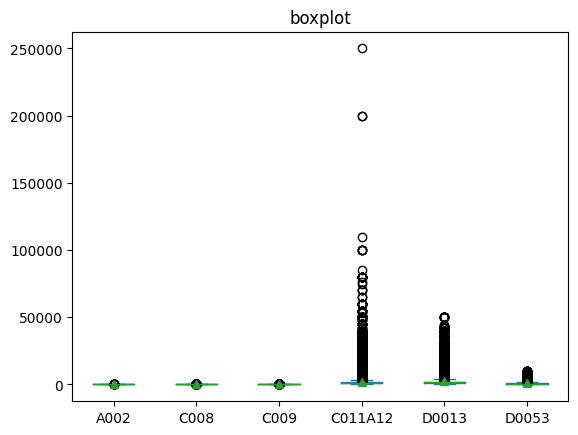

In [21]:
ax = result_df[[
    'A002',     # age
    'C008',     # How many hours a week did you normally work?
    'C009',     # How many hours did you actually work last week?
    'C011A12',  # income in cash
    'D0013',    # Sum of the amounts received?
    'D0053'     # Sum of the amounts received?
    ]].plot(kind='box', title='boxplot', showmeans=True)

plt.show()

### gender

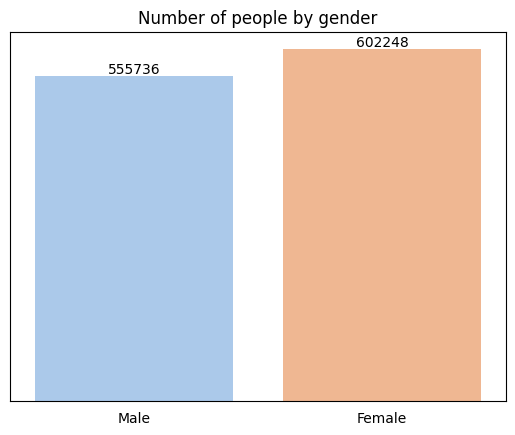

In [22]:
ax = sns.countplot(data=result_df, x='A003', hue='A003', palette='pastel')

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of people by gender')
ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'])

plt.show()

In [23]:
gender_g = result_df \
    .melt(id_vars='A003', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A003', 'category']).size().unstack(fill_value=0) \
    .reset_index()

gender_g

category,A003,1.0,2.0,3.0,4.0,9.0,nan
0,1,11575,36396,234,1036,18,1617949
1,2,14228,41503,378,1364,19,1749252


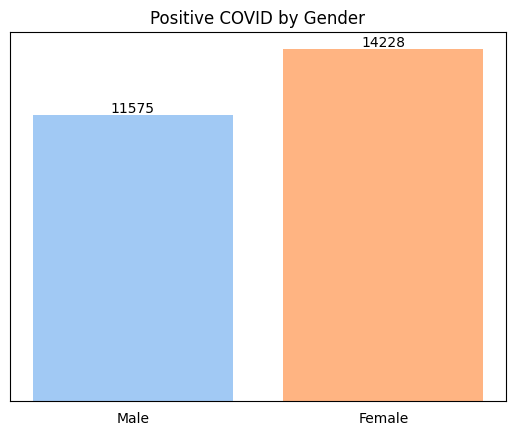

In [24]:
# gender x covid
# Definir a paleta pastel
palette = sns.color_palette('pastel', n_colors=len(gender_g['A003'].unique()))

fig, ax = plt.subplots()
bars = ax.bar(gender_g['A003'], gender_g['1.0'], color=palette)

# labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# adjust
plt.title('Positive COVID by Gender')
ax.set_xlabel('Gender')

ax.tick_params(left=False, bottom=False)
ax.set_xticks(gender_g['A003'])
# ax.set_xticklabels(gender_g['A003'])
ax.set_xticklabels(['Male', 'Female'])

ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()

### age

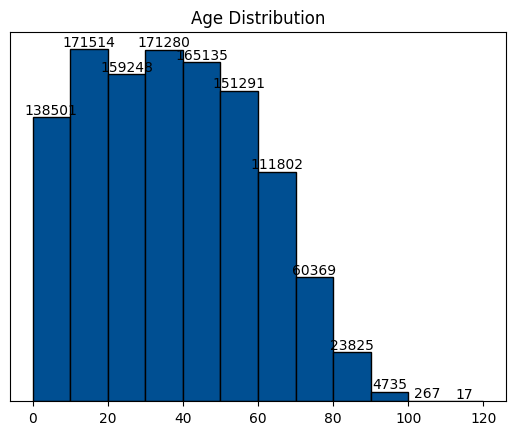

In [25]:
# bins each 10 years
bins = np.arange(result_df['A002'].min(), result_df['A002'].max() + 10, 10)

# histogram
fig, ax = plt.subplots()
n, bins, patches = ax.hist(result_df['A002'], bins=bins, edgecolor='black', color='#004f92')

# labels each bar
for patch in patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')

# remove y labels
ax.set_yticklabels([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', left=False)

plt.show()



In [26]:
age_g = result_df \
    .melt(id_vars='A002', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A002', 'category']).size().unstack(fill_value=0) \
    .reset_index()

# age_g

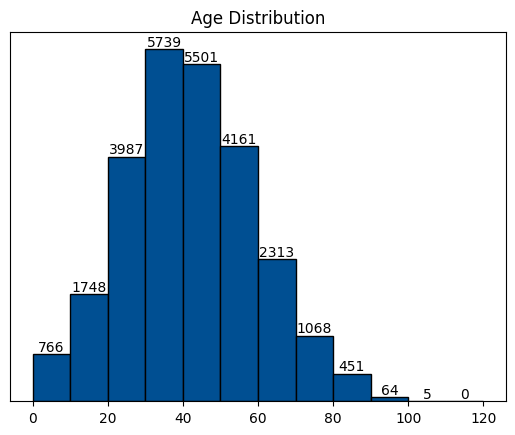

In [27]:
# age x covid
# define bins each 10 years
bins = np.arange(age_g['A002'].min(), age_g['A002'].max() + 10, 10)

# histogram
fig, ax = plt.subplots()
n, bin_edges, patches = ax.hist(age_g['A002'], bins=bins, weights=age_g['1.0'], edgecolor='black', color='#004f92')

# labels
for patch in patches:
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# adjust
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')

# remove label
ax.set_yticklabels([])
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='y', left=False)

plt.show()


### home situation

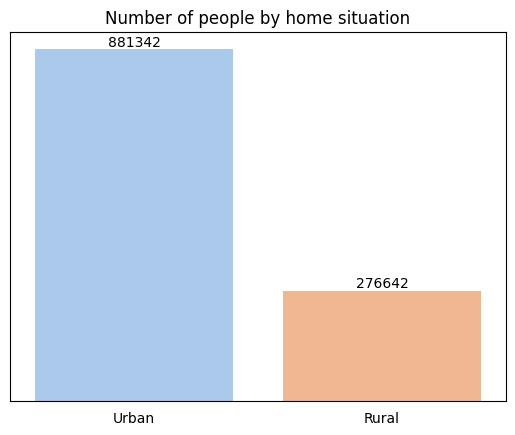

In [28]:
ax = sns.countplot(data=result_df, x='V1022', hue='V1022', palette='pastel')

# labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of people by home situation')
ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)
# ax.set_xlabel('Home situation')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Urban', 'Rural'])

plt.show()

In [29]:
home_g = result_df \
    .melt(id_vars='V1022', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['V1022', 'category']).size().unstack(fill_value=0) \
    .reset_index()

home_g

category,V1022,1.0,2.0,3.0,4.0,9.0,nan
0,1,22494,67823,546,2116,27,2551020
1,2,3309,10076,66,284,10,816181


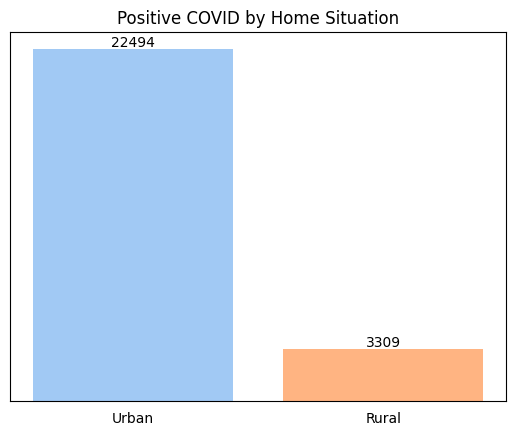

In [30]:
# home situation x covid
# define palette
palette = sns.color_palette('pastel', n_colors=len(home_g['V1022'].unique()))

fig, ax = plt.subplots()
bars = ax.bar(home_g['V1022'], home_g['1.0'], color=palette)

# labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# adjust
plt.title('Positive COVID by Home Situation')

ax.tick_params(left=False, bottom=False)
ax.set_xticks(home_g['V1022'])
# ax.set_xticklabels(gender_g['A003'])
ax.set_xticklabels(['Urban', 'Rural'])

ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()

### color or race

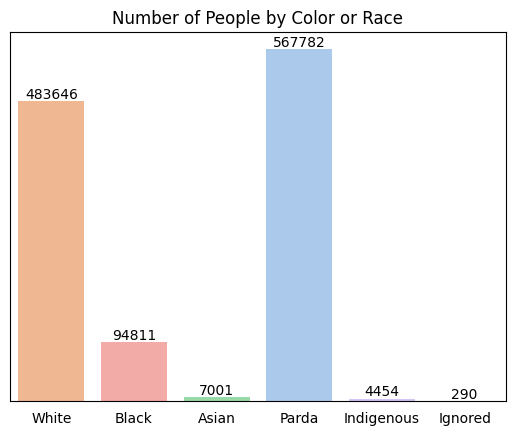

In [31]:
# set order for the x-axis
desired_order = ['1', '2', '3', '4', '5', '9']

# define palette
palette = sns.color_palette('pastel', n_colors=len(result_df['A004'].unique()))

fig, ax = plt.subplots()
sns.countplot(data=result_df, x='A004', hue='A004', palette=palette, order=desired_order, ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of People by Color or Race')
ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['White', 'Black', 'Asian','Parda', 'Indigenous', 'Ignored'])

plt.show()


In [32]:
race_g = result_df \
    .melt(id_vars='A004', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A004', 'category']).size().unstack(fill_value=0) \
    .reset_index()

race_g

category,A004,1.0,2.0,3.0,4.0,9.0,nan
0,1,9979,35665,227,1020,13,1404034
1,2,2197,6671,53,230,4,275278
2,3,118,561,1,22,0,20301
3,4,13277,34652,330,1113,18,1653956
4,5,218,337,1,14,2,12790
5,9,14,13,0,1,0,842


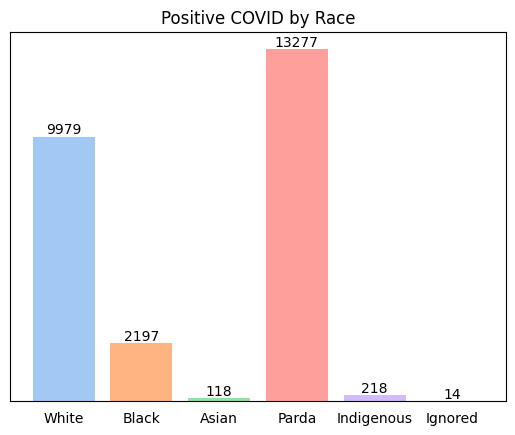

In [33]:
# race x covid
# define palette
palette = sns.color_palette('pastel', n_colors=len(race_g['A004'].unique())) # mismatch colors

fig, ax = plt.subplots()
bars = ax.bar(race_g['A004'], race_g['1.0'], color=palette)

# labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# adjust
plt.title('Positive COVID by Race')

ax.tick_params(left=False, bottom=False)
ax.set_xticks(race_g['A004'])

ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)

ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['White', 'Black', 'Asian','Parda', 'Indigenous', 'Ignored'])

plt.show()

### education

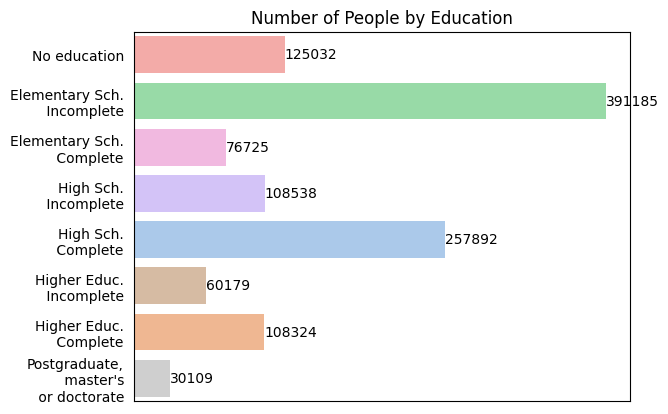

In [34]:
# set order for the x-axis
desired_order = ['1', '2', '3', '4', '5', '6', '7', '8']

# define palette
palette = sns.color_palette('pastel', n_colors=len(result_df['A005'].unique()))

fig, ax = plt.subplots()
sns.countplot(data=result_df, y='A005', hue='A005', palette=palette, order=desired_order, ax=ax)

# labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

# adjust
plt.title('Number of People by Education')
ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)
ax.tick_params(left=False)
ax.tick_params(bottom=False)

ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(['No education', 'Elementary Sch.\n Incomplete', 'Elementary Sch.\n Complete',
                    'High Sch.\n Incomplete', 'High Sch.\n Complete',
                    'Higher Educ.\n Incomplete', 'Higher Educ.\n Complete',
                    "Postgraduate,\n master's\n or doctorate"
                    ])

plt.show()

In [35]:
edu_g = result_df \
    .melt(id_vars='A005', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['A005', 'category']).size().unstack(fill_value=0) \
    .reset_index()

edu_g

category,A005,1.0,2.0,3.0,4.0,9.0,nan
0,1,1156,3595,34,156,3,370152
1,2,5045,14818,78,522,11,1153081
2,3,1536,4181,34,123,1,224300
3,4,2078,5387,40,205,3,317901
4,5,7595,21258,197,630,9,743987
5,6,2147,6601,65,226,4,171494
6,7,4757,16259,116,401,6,303433
7,8,1489,5800,48,137,0,82853


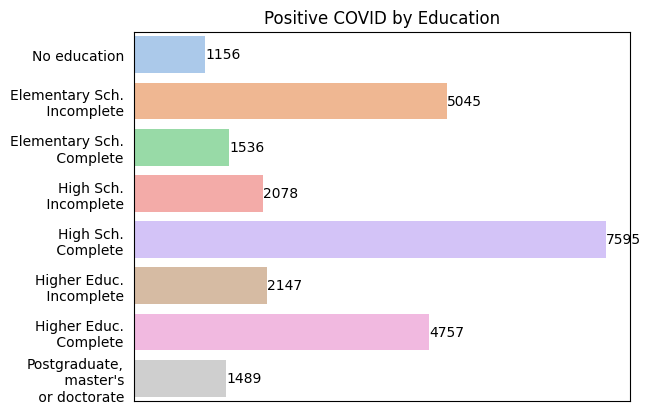

In [36]:
# Filtrar os dados para remover entradas com contagem zero
edu_g = edu_g[edu_g['1.0'] > 0]

# set order for the y-axis
desired_order = ['1', '2', '3', '4', '5', '6', '7', '8']

# Define palette
palette = sns.color_palette('pastel', n_colors=len(edu_g['A005'].unique()))

fig, ax = plt.subplots()
bars = sns.barplot(data=edu_g, y='A005', x='1.0', hue='A005', palette=palette, order=desired_order, ax=ax)

# Adicionar rótulos às barras
for bar in bars.patches:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10)

# Ajustar o gráfico
plt.title('Positive COVID by Education')

ax.tick_params(left=False, bottom=False)
ax.set_xticks([])
ax.set_xlabel(None)
ax.set_ylabel(None)

ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticklabels(['No education', 'Elementary Sch.\n Incomplete', 'Elementary Sch.\n Complete',
                    'High Sch.\n Incomplete', 'High Sch.\n Complete',
                    'Higher Educ.\n Incomplete', 'Higher Educ.\n Complete',
                    "Postgraduate,\n master's\n or doctorate"
                    ])

plt.show()


### region

In [37]:
# what is the distribution of the number of confirmed COVID-19 cases by region?
# 1 = positive; 2 = negative; 3 = inconclusive; 4 = Not yet received result; 5 = ignored; 6 = Not applicable
region_g = result_df \
    .melt(id_vars='region', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['region', 'category']).size().unstack(fill_value=0) \
    .reset_index()

region_g

category,region,1.0,2.0,3.0,4.0,9.0,nan
0,Centro-Oeste,3599,11805,73,358,5,351168
1,Nordeste,8548,22407,163,536,16,1032226
2,Norte,5586,8359,130,359,2,409803
3,Sudeste,5618,23114,183,745,10,992079
4,Sul,2452,12214,63,402,4,581925


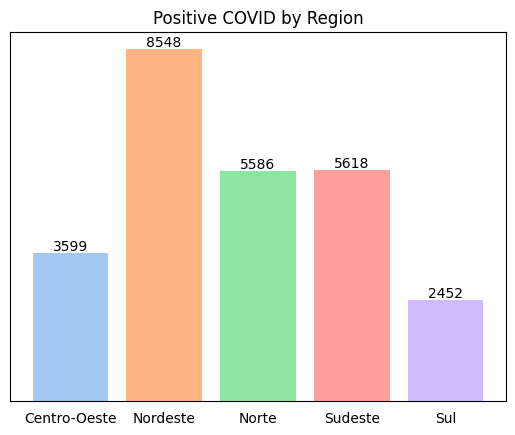

In [38]:
# region x covid
# define palette
palette = sns.color_palette('pastel', n_colors=len(region_g['region'].unique()))

fig, ax = plt.subplots()
bars = ax.bar(region_g['region'], region_g['1.0'], color=palette)

# labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# adjust
plt.title('Positive COVID by Region')

ax.tick_params(left=False, bottom=False)
ax.set_xticks(region_g['region'])

ax.set(yticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()

### income

In [39]:
# what is the distribution between income level and the incidence of confirmed COVID-19 cases?
'''
0: 0 - 100
1: 101 - 300
2: 301 - 600
3: 601 - 800
4: 801 - 1.600
5: 1.601 - 3.000
6: 3.001 - 10.000
7: 10.001 - 50.000
8: 50.001 - 100.000
9: More than 100.000
NaN:	Not applicable
'''
income_g = result_df \
    .melt(id_vars='C01011', value_vars=['B009B', 'B009D', 'B009F'], var_name='source', value_name='category') \
    .groupby(['C01011', 'category']).size().unstack(fill_value=0) \
    .reset_index()

income_g

category,C01011,1.0,2.0,3.0,4.0,9.0,nan
0,0.0,46,120,3,6,0,9110
1,1.0,220,606,6,20,1,42176
2,2.0,486,1547,11,64,0,87634
3,3.0,311,915,9,30,0,48595
4,4.0,6045,18111,134,566,8,535536
5,5.0,4196,13005,83,324,4,290704
6,6.0,3054,11364,84,234,5,158893
7,7.0,578,2554,13,41,0,20523
8,8.0,9,34,0,0,0,143
9,9.0,1,1,0,0,0,22


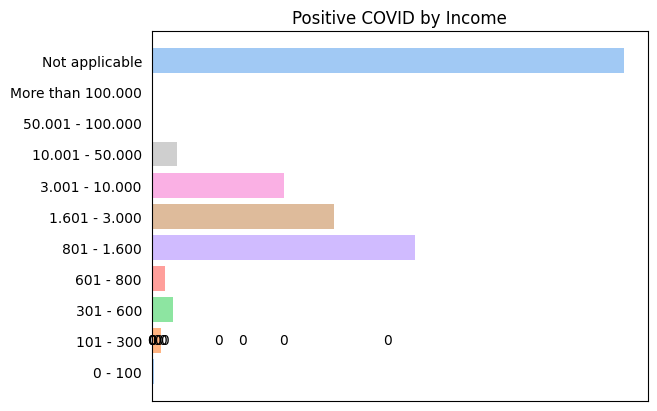

In [40]:
# income x covid
income_g = income_g[income_g['1.0'] > 0]

# define palette
palette = sns.color_palette('pastel', n_colors=len(income_g['C01011'].unique()))

fig, ax = plt.subplots()
bars = ax.barh(income_g['C01011'], income_g['1.0'], color=palette)

# labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)

# adjust
plt.title('Positive COVID by Income')

ax.tick_params(left=False, bottom=False)
ax.set_yticks(income_g['C01011'])

ax.set(xticklabels=[])
ax.set(ylabel=None)
ax.set(xlabel=None)

ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_yticklabels(['0 - 100',
                    '101 - 300',
                    '301 - 600',
                    '601 - 800',
                    '801 - 1.600',
                    '1.601 - 3.000',
                    '3.001 - 10.000',
                    '10.001 - 50.000',
                    '50.001 - 100.000',
                    'More than 100.000',
                    'Not applicable'
                    ])

plt.show()